# 2-2 Exploratory analysis - 6 classes - speakers

In [1]:
%load_ext autoreload
%autoreload 2

from import_file import*

In [2]:
path = Path.cwd() / "processed_data" / "df_raw.pkl"
df_raw = pd.read_pickle(path)

## Show number of unique speakers

In [3]:
# Total number of unique speakers
speakers_data = df_raw.copy()
speakers_name = speakers_data['speaker'].unique()
print('The total number of speakers in LIAR-PLUS datasets is %d.' %len(speakers_name))

The total number of speakers in LIAR-PLUS datasets is 3318.


## Stacked bar chart for prominent speakers

In [4]:
# Display speakers that make more than 100 statements
speakers_count = speakers_data.groupby('speaker').statement.count()
speakers_name = speakers_count[speakers_count>100]
print('The number of speakers in LIAR-PLUS dataset which make more than 100 statements is %d.' %len(speakers_name))

The number of speakers in LIAR-PLUS dataset which make more than 100 statements is 13.


In [5]:
# Only prominent speakers are included in visualization
speakers_data = speakers_data[speakers_data['speaker'].isin(speakers_name.keys())]

In [6]:
# Function to count the statements of the speakers groupby classes
def class_count(data, column):
    return data.groupby([column, 'label']).agg({'json ID':'count'})

Text(0.5, 1.0, 'Count and label of statements by top 13 speakers in LIAR-PLUS dataset')

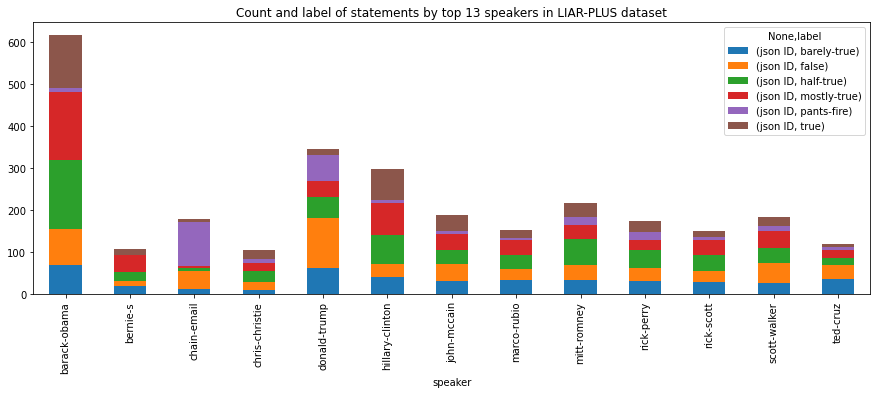

In [7]:
# Stacked bar plot of speakers with class and count of statements
breakdown = class_count(speakers_data, 'speaker')
breakdown.unstack().plot(kind='bar', stacked=True, figsize=(15,5))
plt.title("Count and label of statements by top %d speakers in LIAR-PLUS dataset" %len(speakers_name))

In [8]:
# Function to normalize the statements and the speakers for comparison purpose

def normalize(data, column):
    norm = data.reset_index()
    norm = norm.set_index([column,'label'])['json ID'].unstack(fill_value=0)

    row_totals = norm.sum(axis=1)
    for row in range(len(norm.index)):
        norm.iloc[row]/= row_totals[row]

    norm = norm.stack().reset_index(name='Percent').set_index([column, 'label'])
    return norm

Text(0.5, 1.0, 'Count and label of statements by top 13 speakers in LIAR-PLUS dataset')

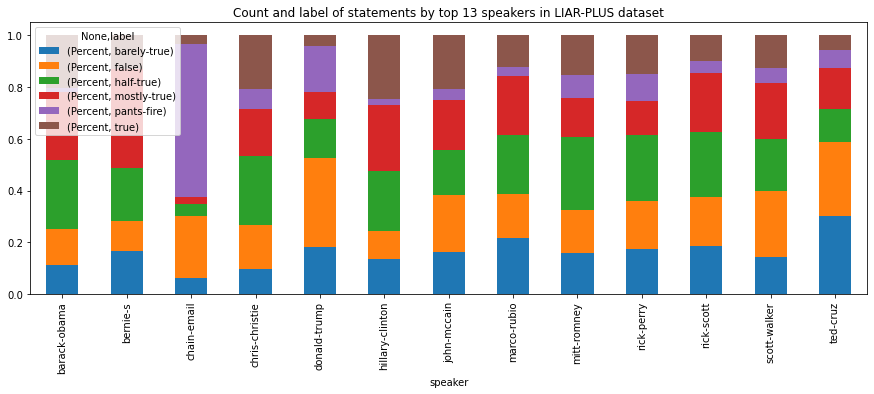

In [9]:
# Normalized stacked bar plot of speakers with class and count of statements
normalized_data = normalize(breakdown, 'speaker')
normalized_data.unstack().plot(kind='bar', stacked=True, figsize=(15,5))
plt.title("Count and label of statements by top %d speakers in LIAR-PLUS dataset" %len(speakers_name))